# Task 1

## Load the Data

In [45]:
import sys
sys.path.append('../src')  # Add the src directory to the system path

from data_quality_check import DataQualityCheck
from data_clean_processing import DataCleanProcessing

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# Set the file path for the data file
file_path = '../data/MachineLearningRating_v3.txt'

In [47]:
# Display the first few rows
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## Checking Missing Value

In [48]:
# Initialize and load data
data_quality = DataQualityCheck(file_path)
data = data_quality.load_data()
data_quality.basic_info()

   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

## Data Clean Processing

In [49]:
# Initialize the DataCleanProcessing class with the loaded data
data_cleaner = DataCleanProcessing(data)

# Clean the data
cleaned_data = data_cleaner.clean_missing_values()

# Verify no missing values remain
if data_cleaner.verify_no_missing_values():
    print("Data cleaned successfully with no missing values remaining.")
else:
    print("There are still missing values in the data.")

d:\Insurance_Claims_Analysis\notebooks\../src\data_clean_processing.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data[column].fillna(self.data[column].median(), inplace=True)
d:\Insurance_Claims_Analysis\notebooks\../src\data_clean_processing.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Total missing values after cleaning: 1000098
There are still missing values in the data.


In [50]:
# Display the shape of the dataframe after cleaning, to check any drop column.
data.shape

(1000098, 52)

In [51]:
# Display information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      1000098 non-null  object 
 9   AccountType               1000098 non-null  object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

## EDA

### Univariate Analysis

#### Histograms for numerical columns:

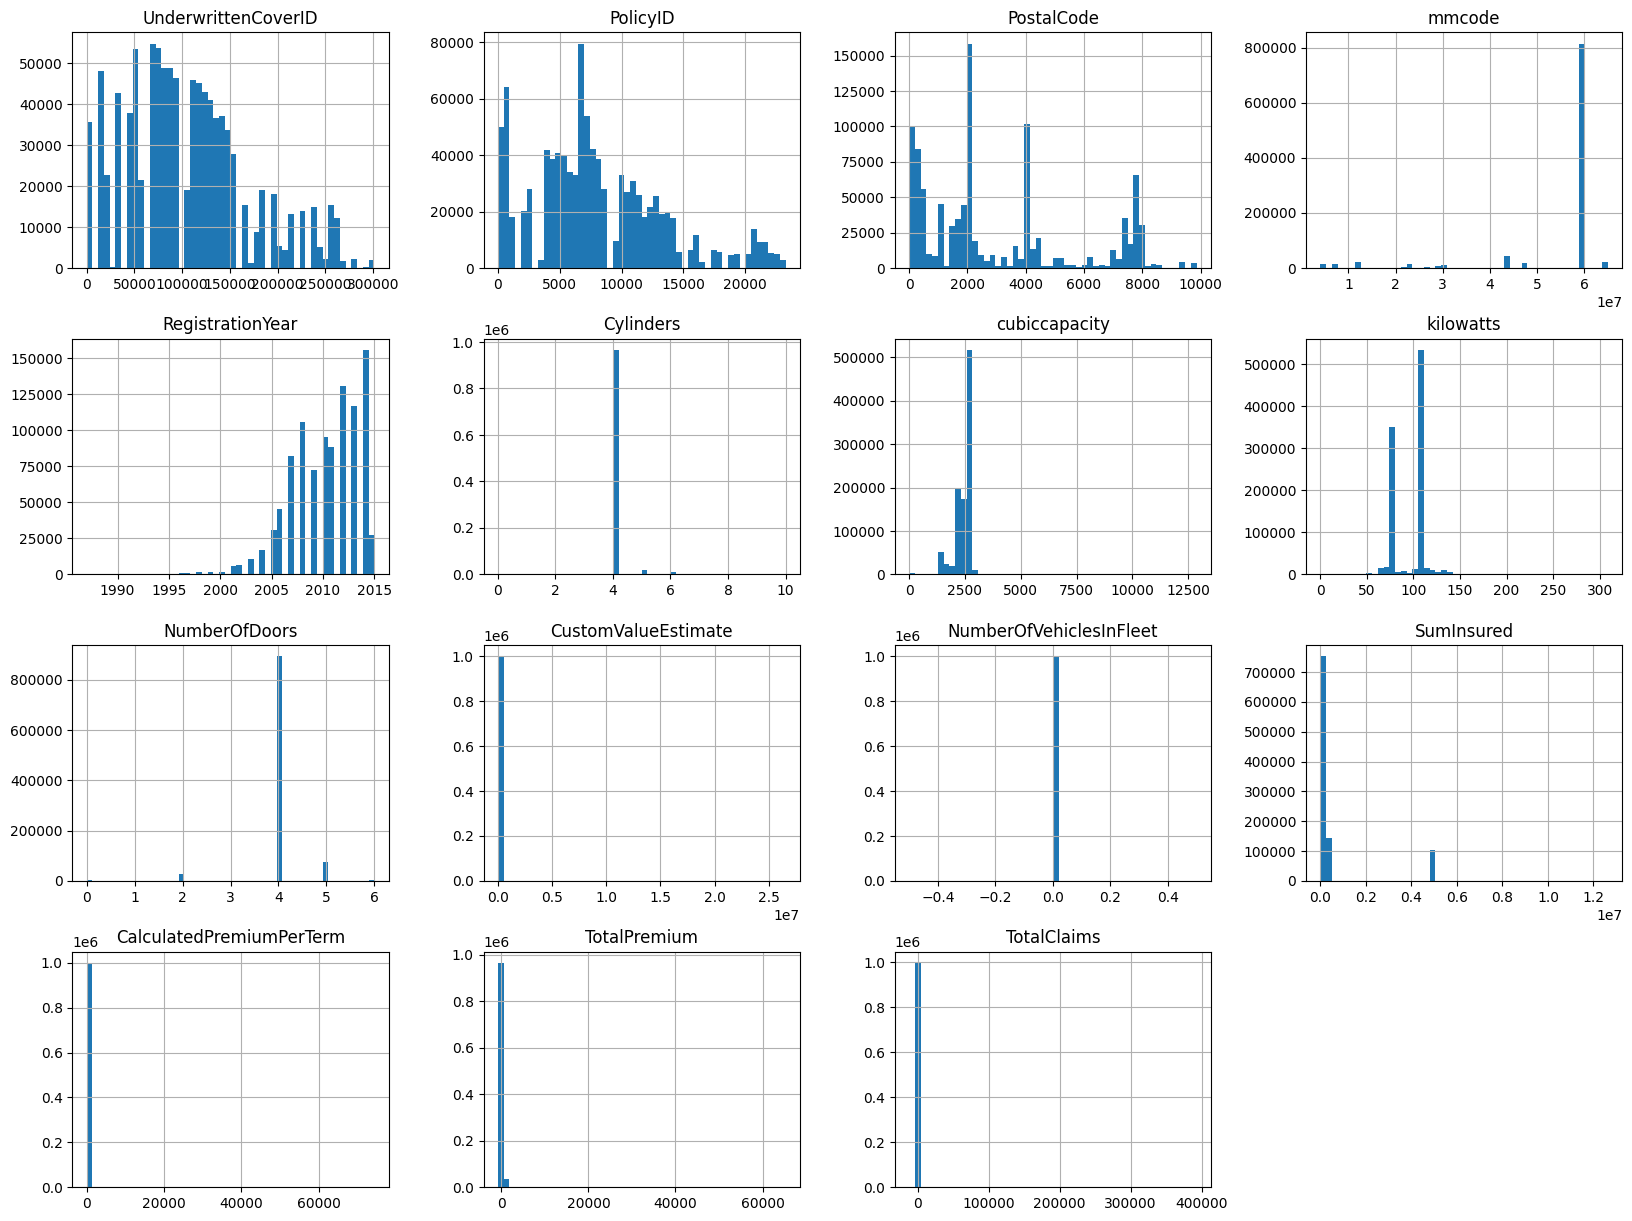

In [43]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
data.hist(bins=50, figsize=(20, 15))
plt.show()

#### Bar charts for categorical columns:

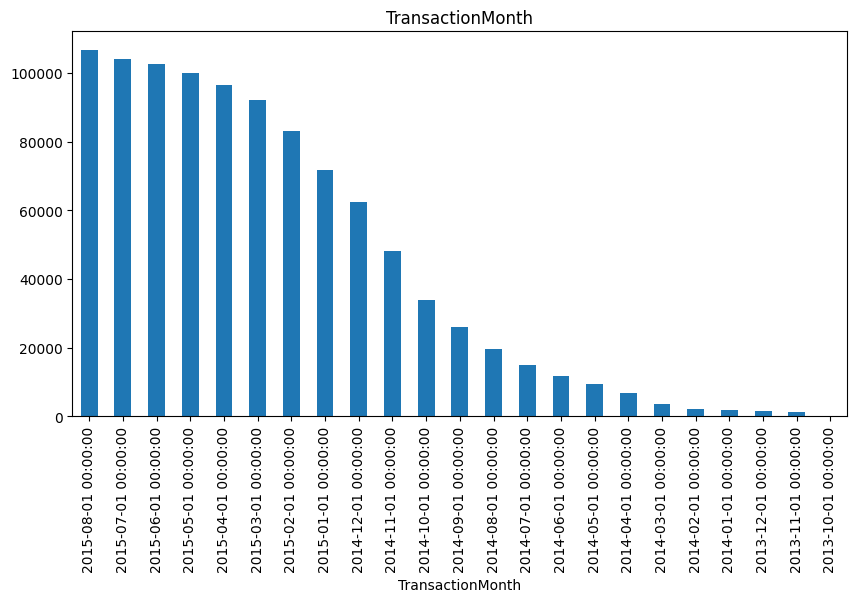

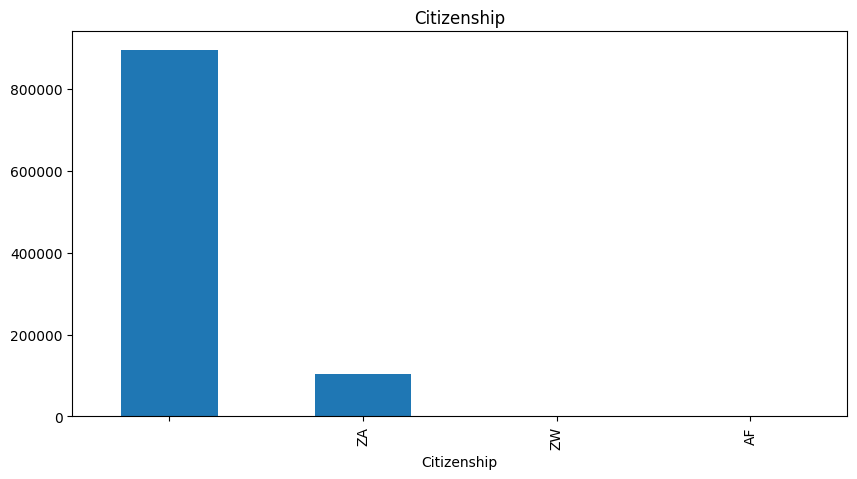

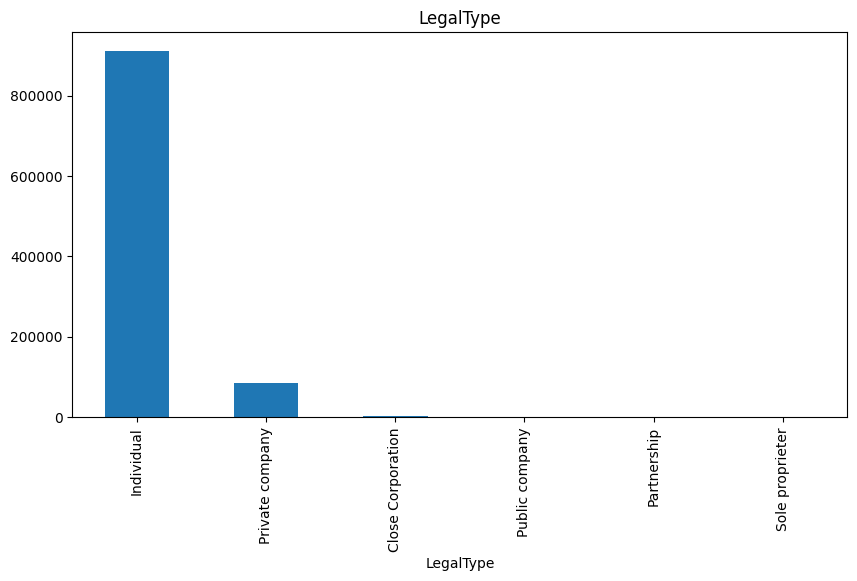

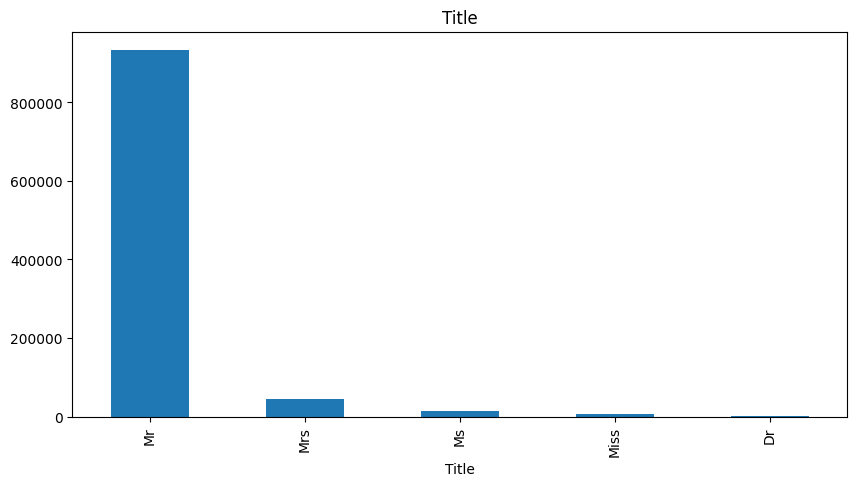

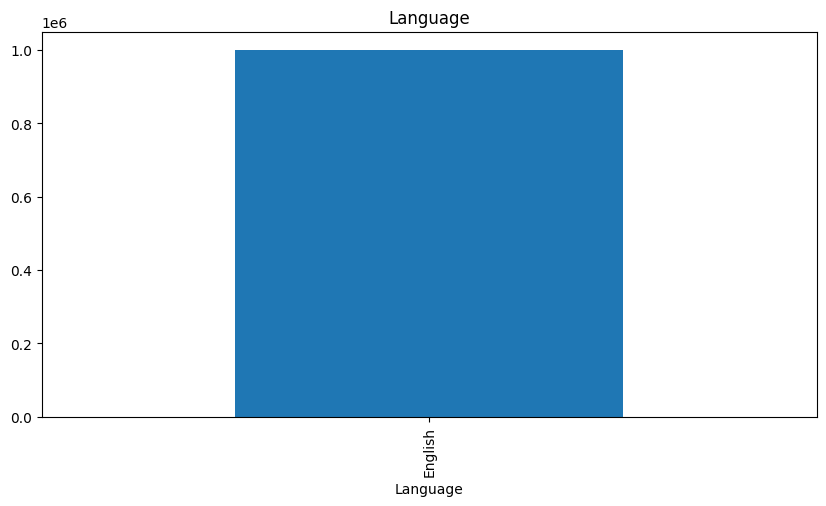

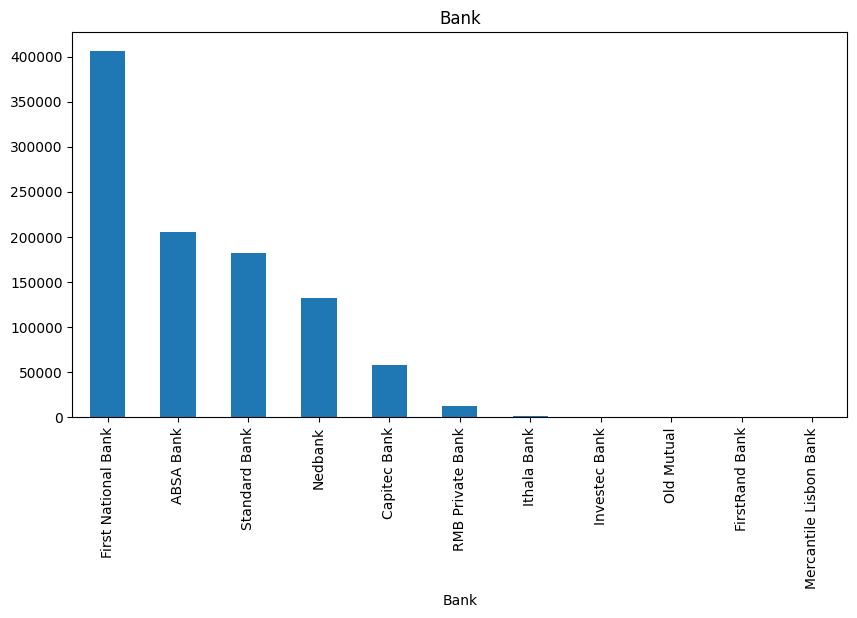

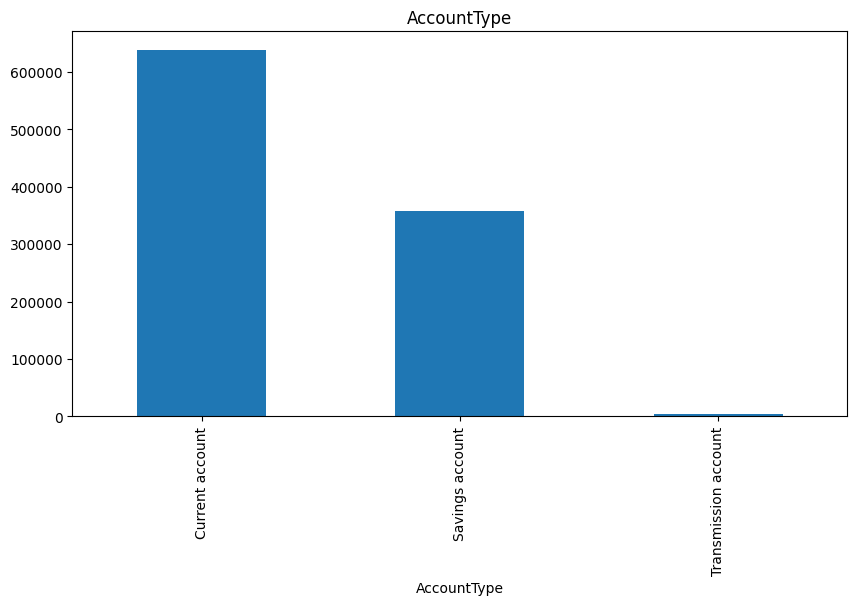

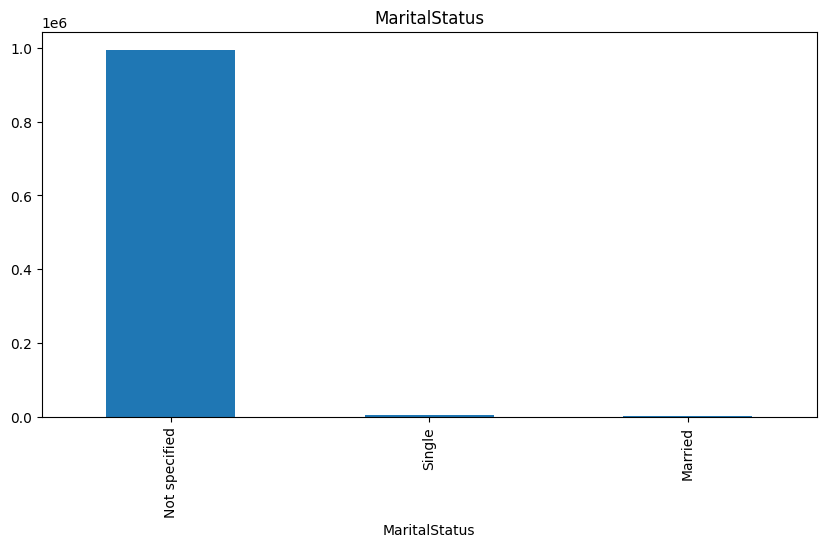

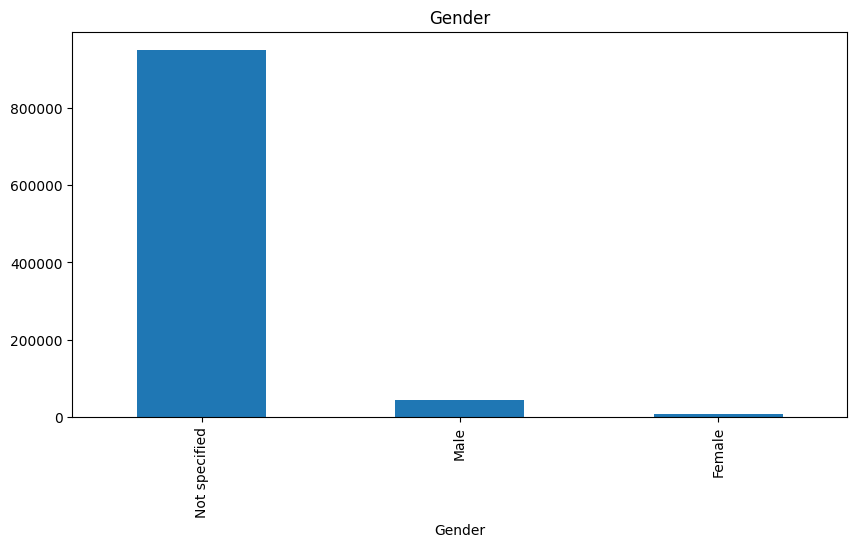

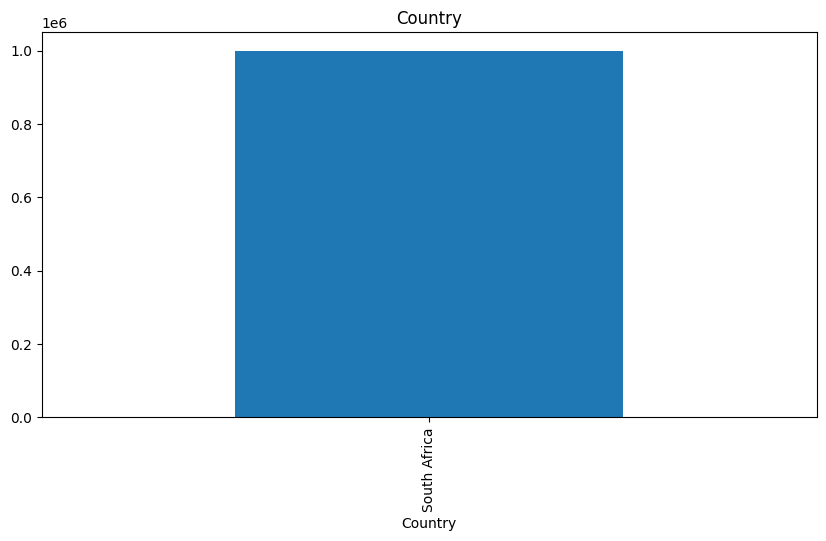

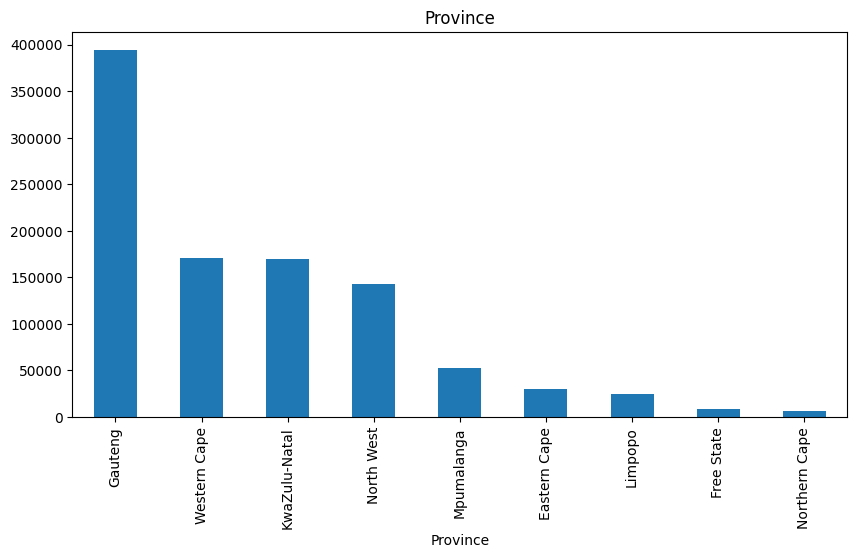

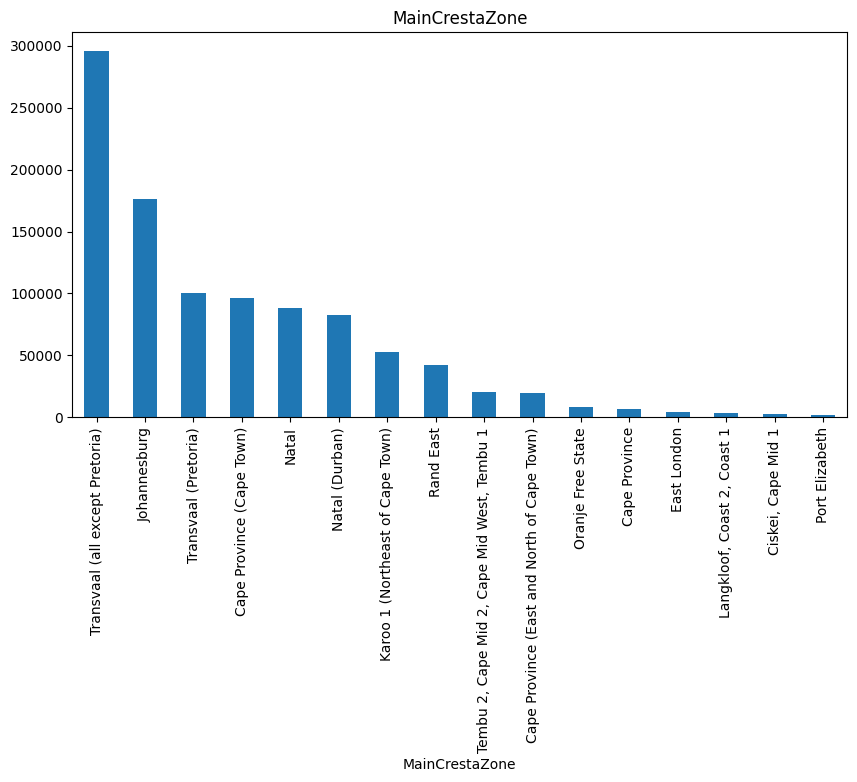

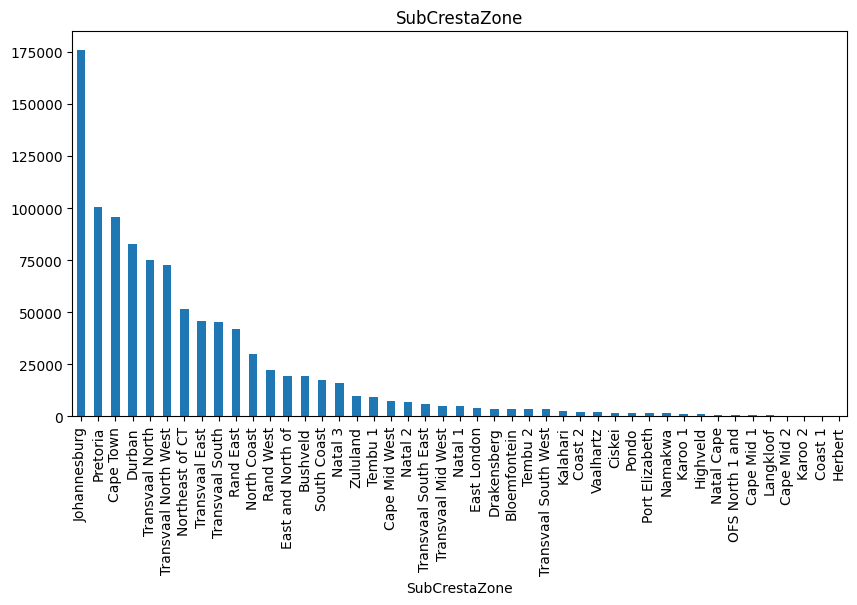

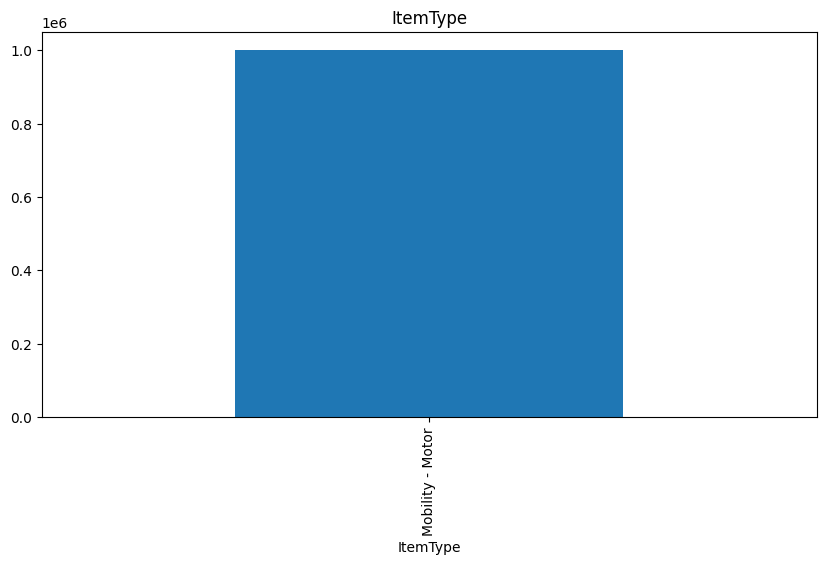

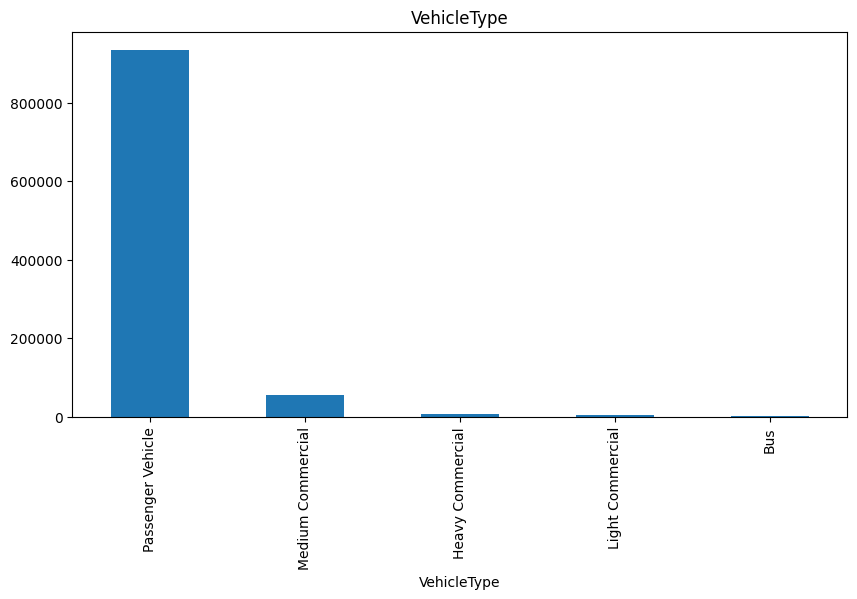

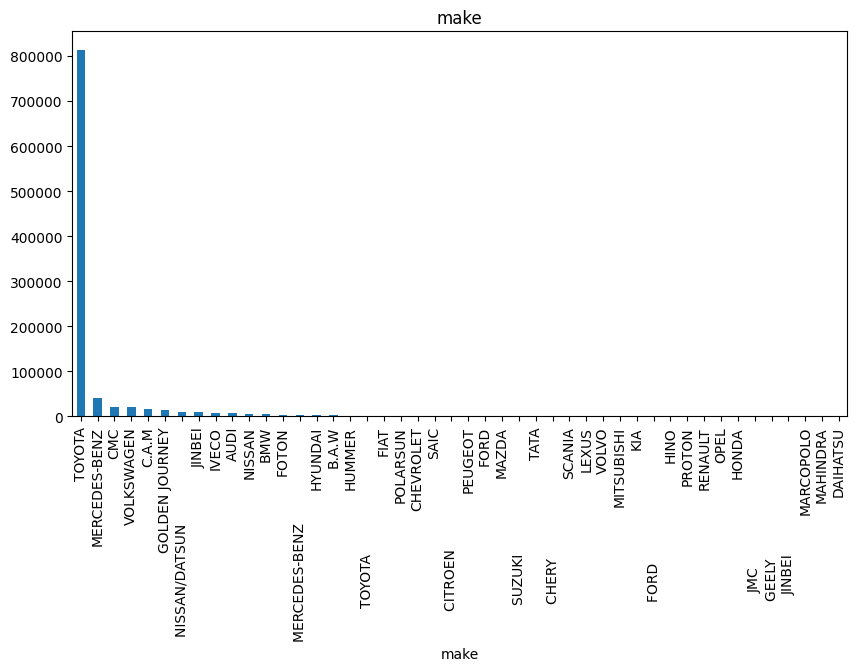

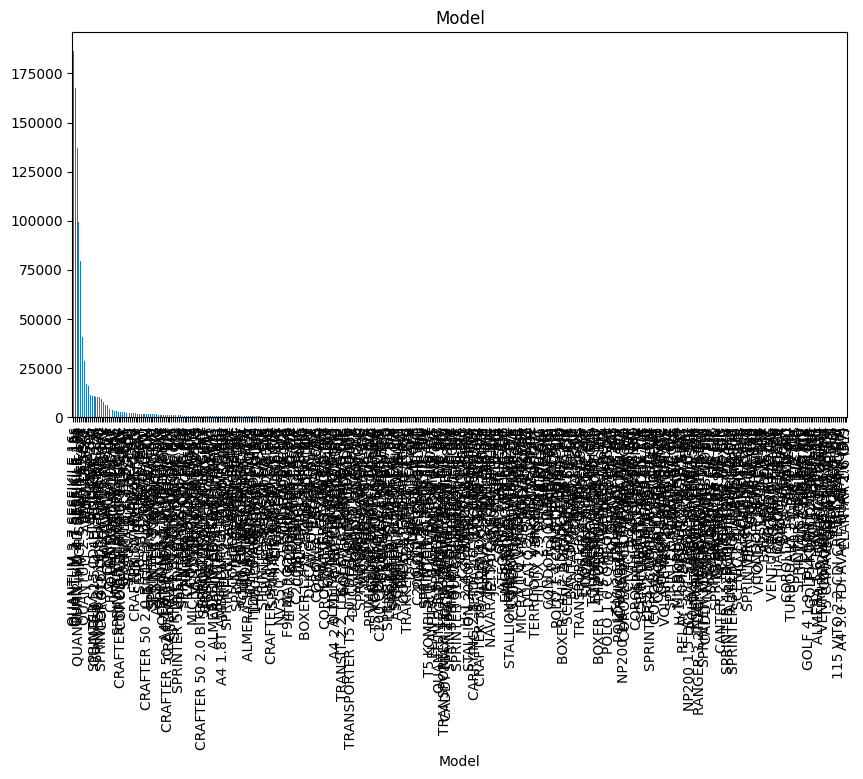

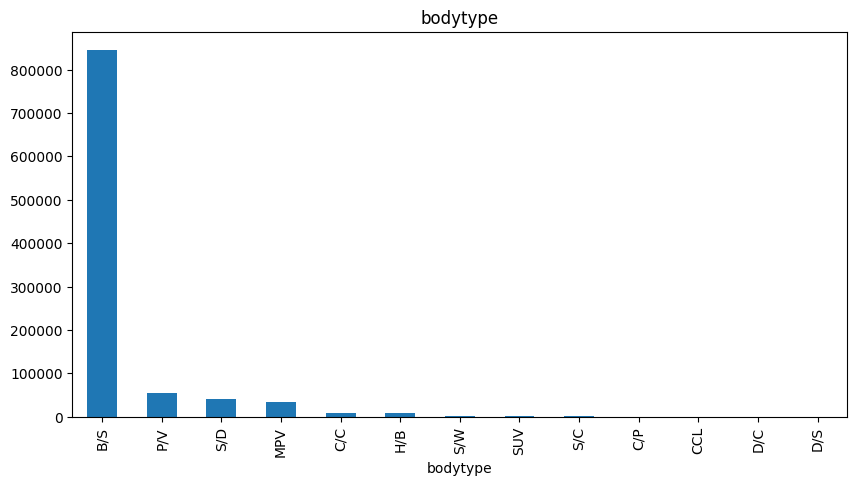

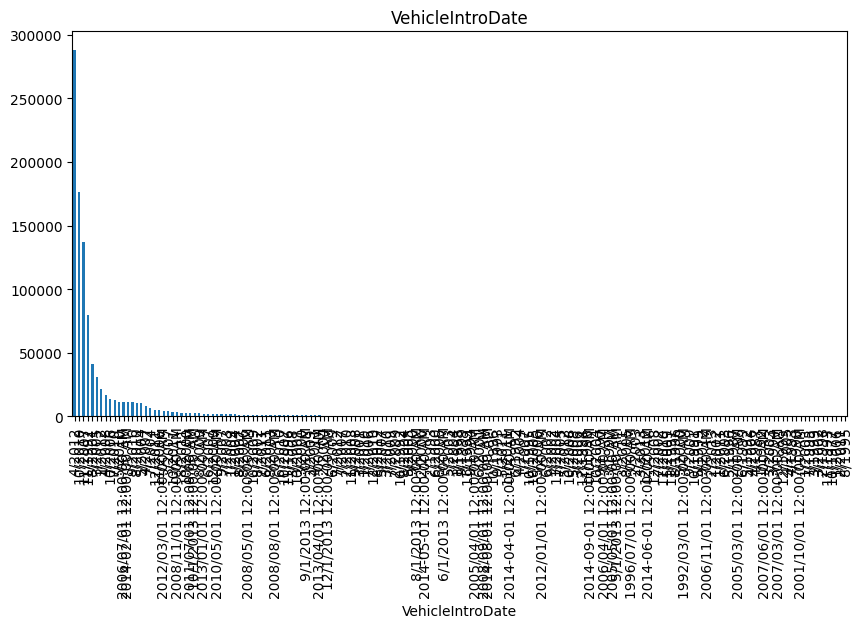

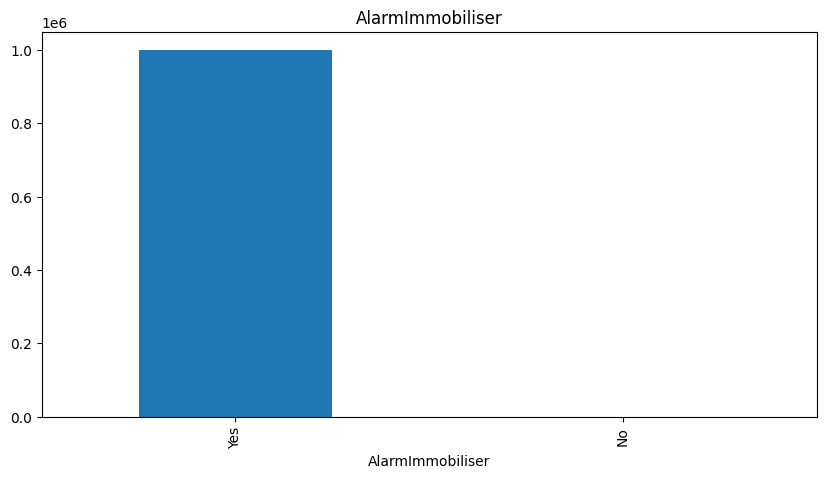

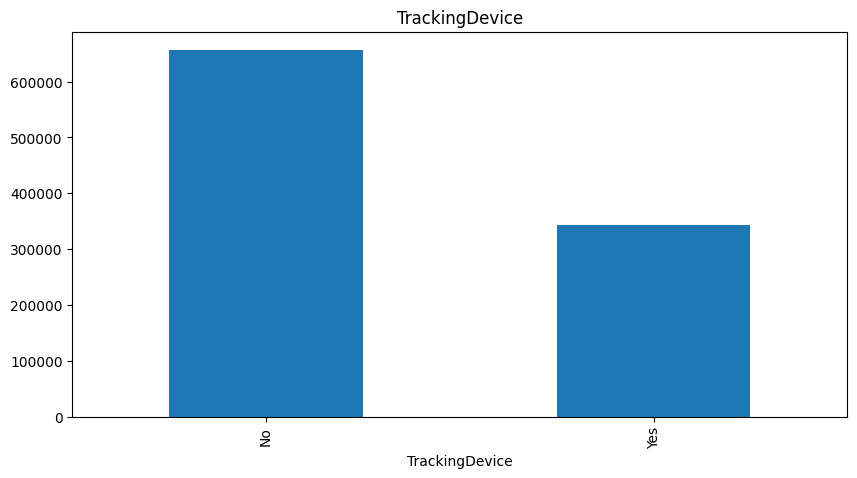

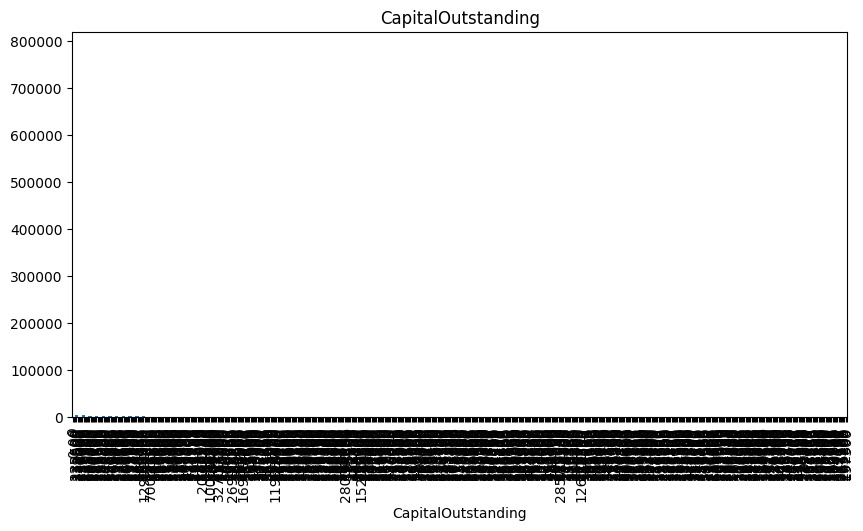

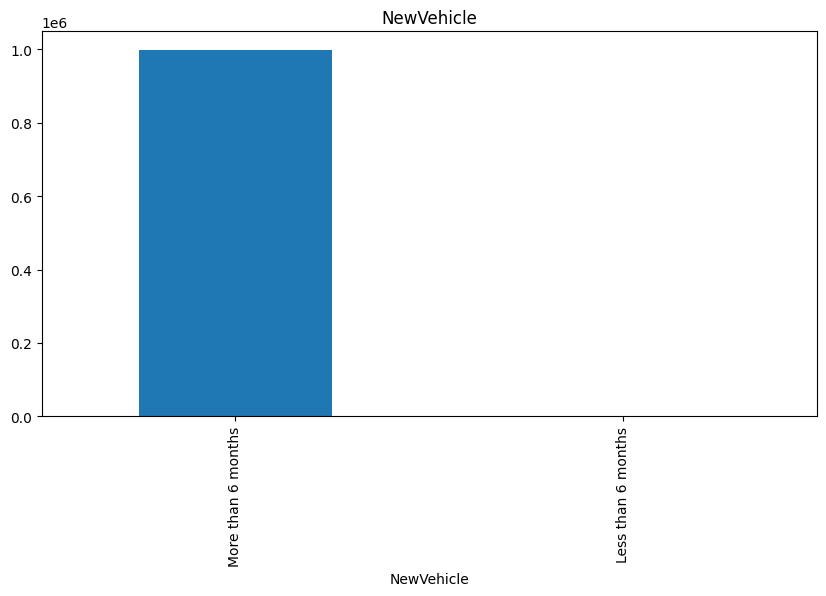

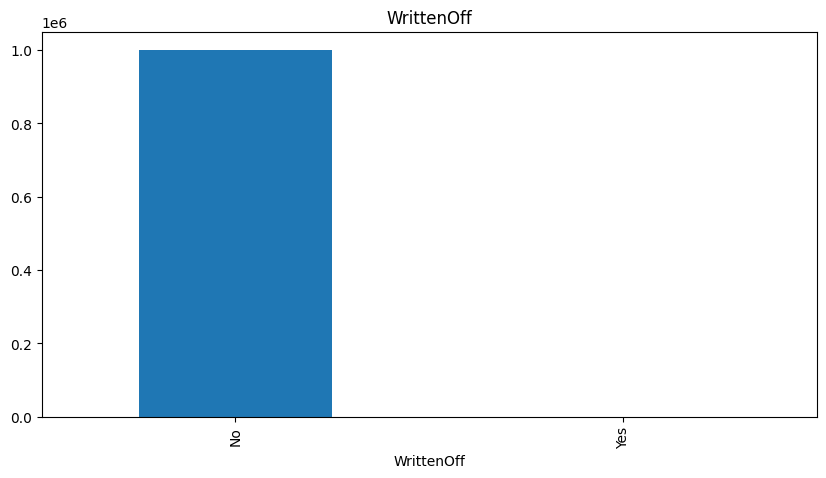

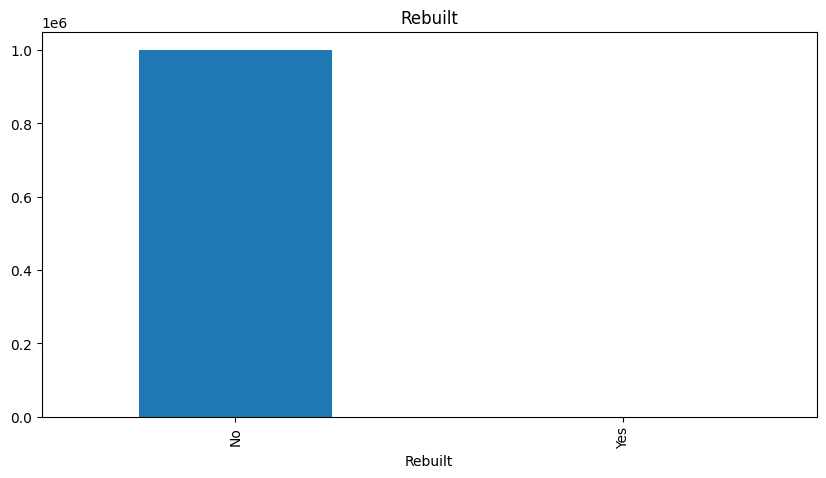

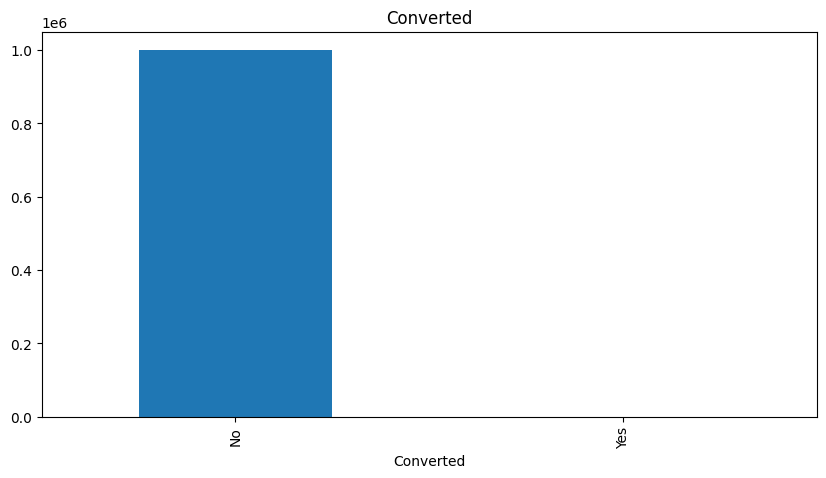

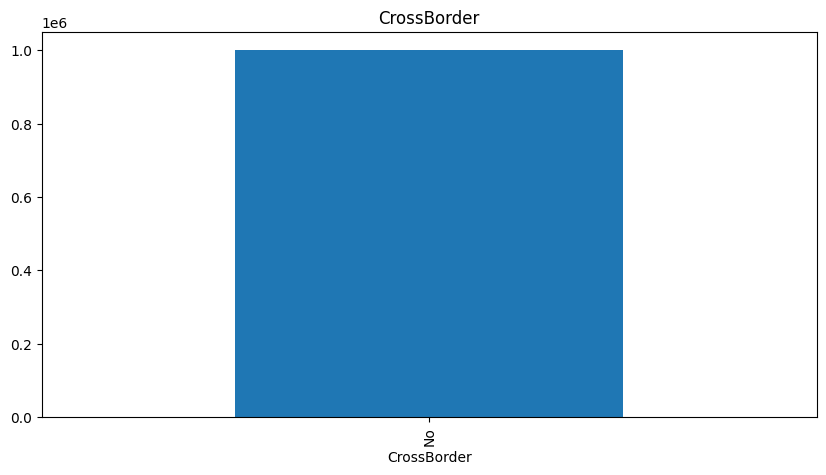

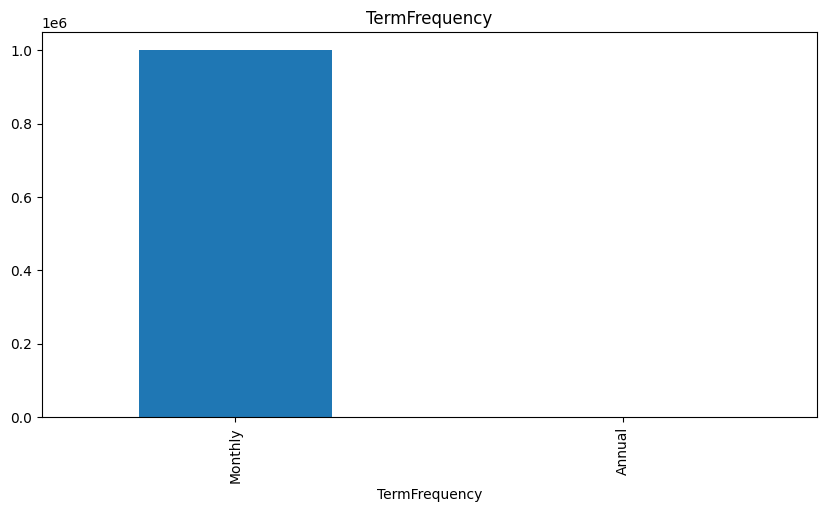

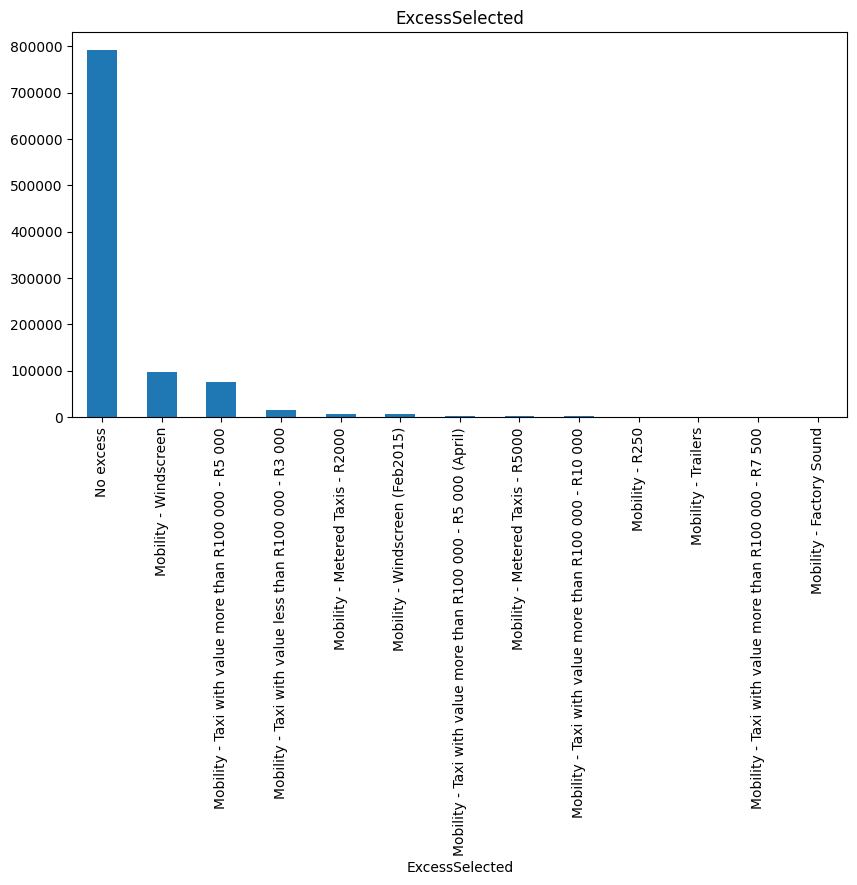

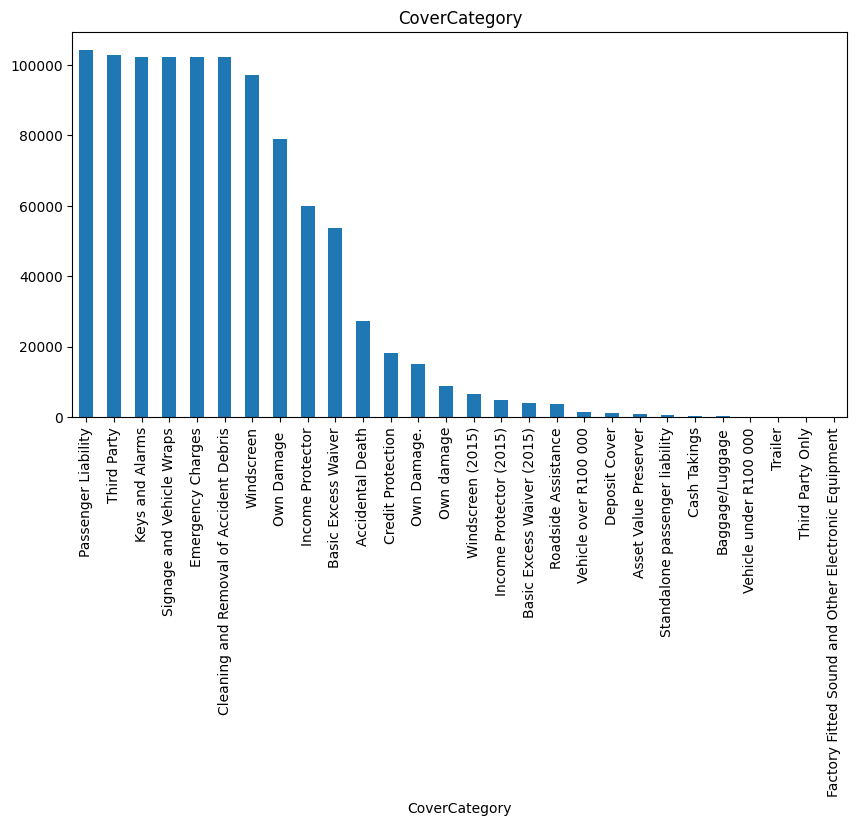

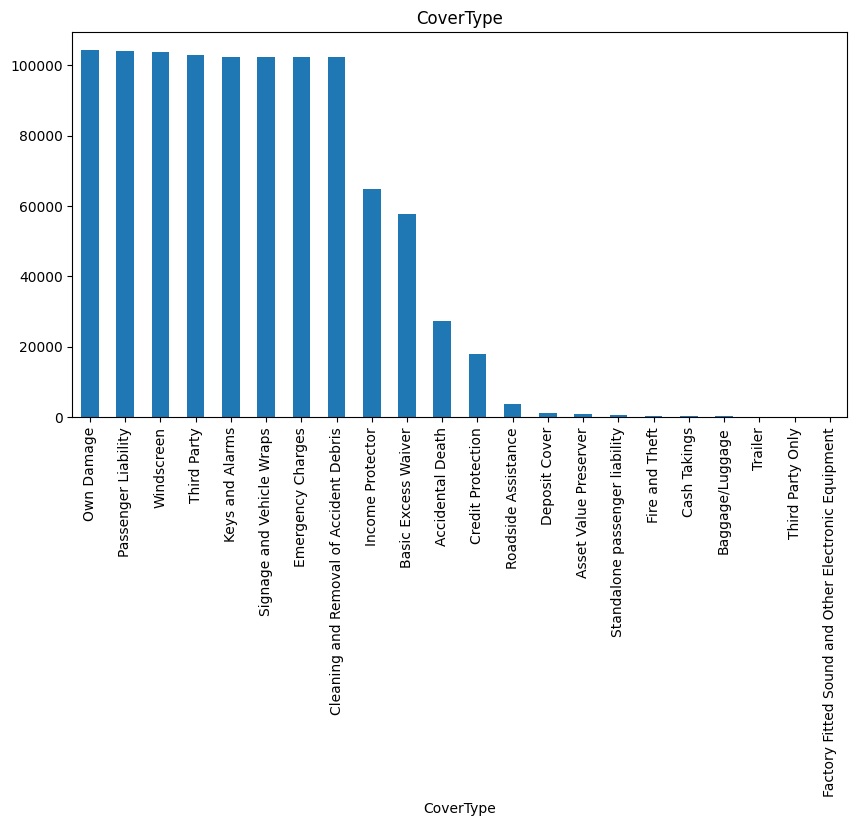

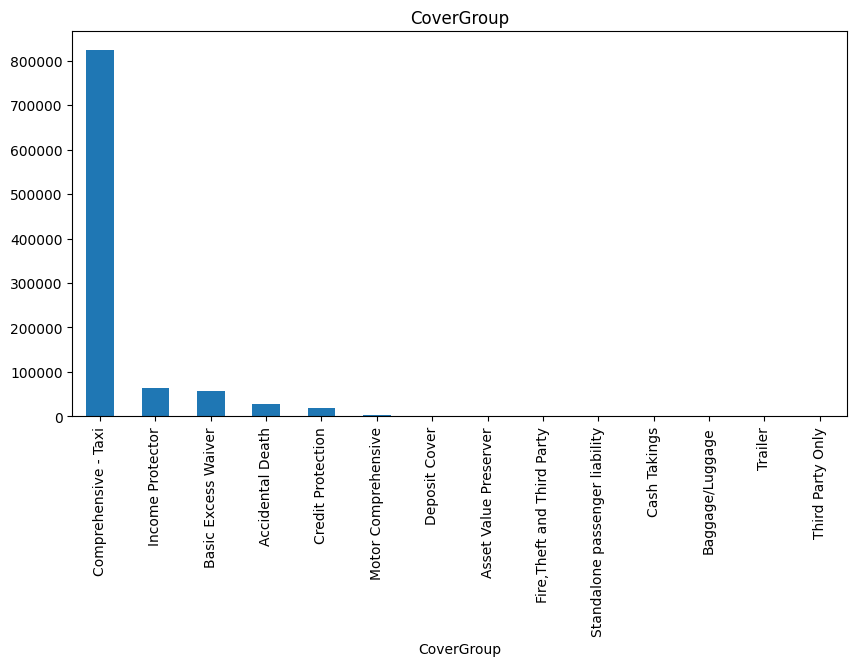

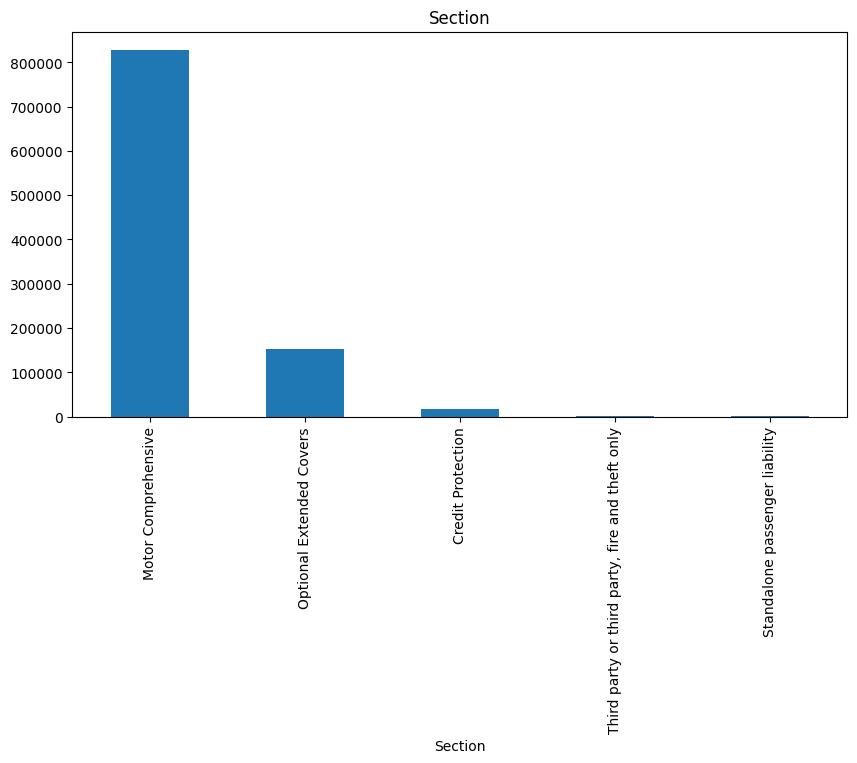

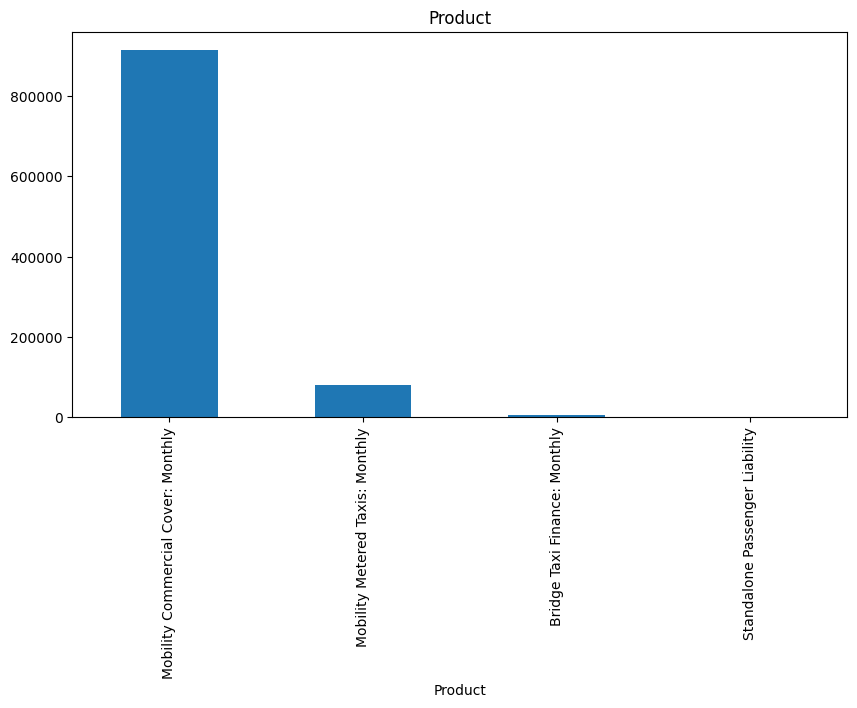

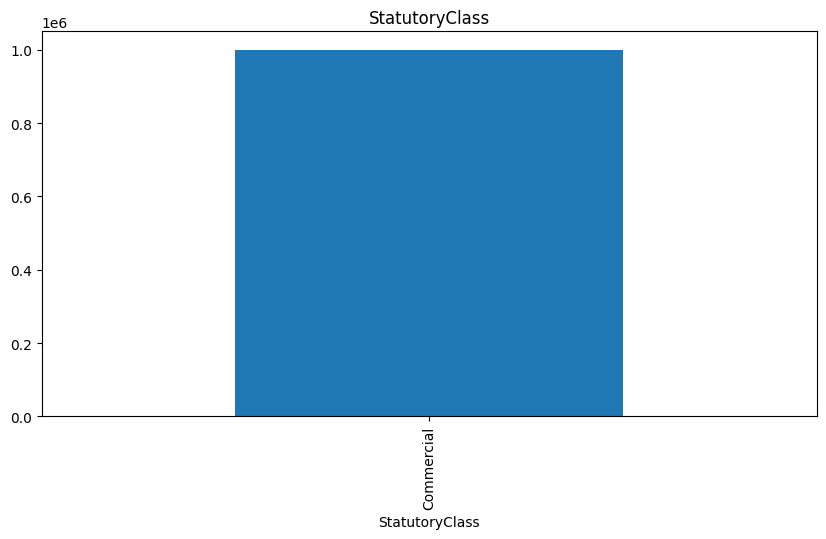

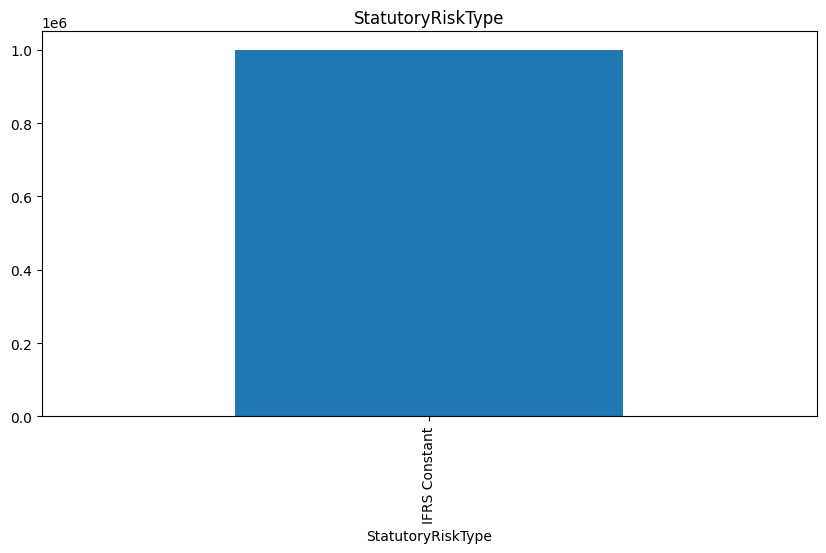

In [44]:
# Plot bar charts for categorical columns
for column in data.select_dtypes(include=['object']).columns:
    data[column].value_counts().plot(kind='bar', figsize=(10, 5))
    plt.title(column)
    plt.show()

### Bivariate Analysis

#### Scatter plots for relationships between numerical columns:

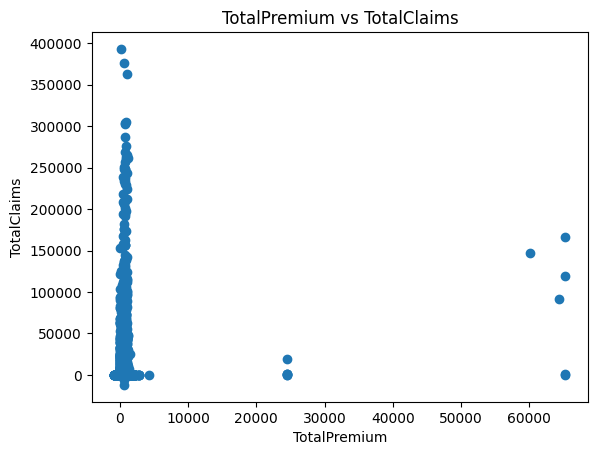

In [45]:
# Example scatter plot: TotalPremium vs TotalClaims
plt.scatter(data['TotalPremium'], data['TotalClaims'])
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.title('TotalPremium vs TotalClaims')
plt.show()

## Correlation matrix:

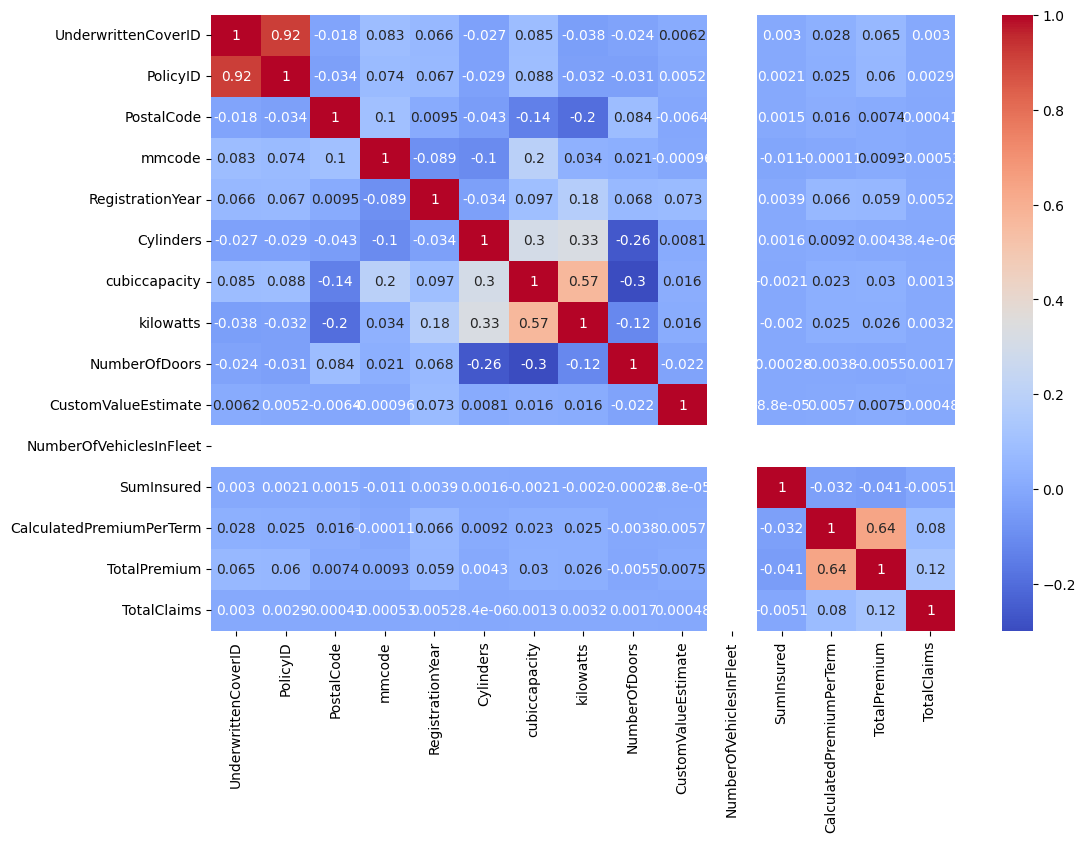

In [35]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Outlier Detection

#### Box plots for outlier detection:

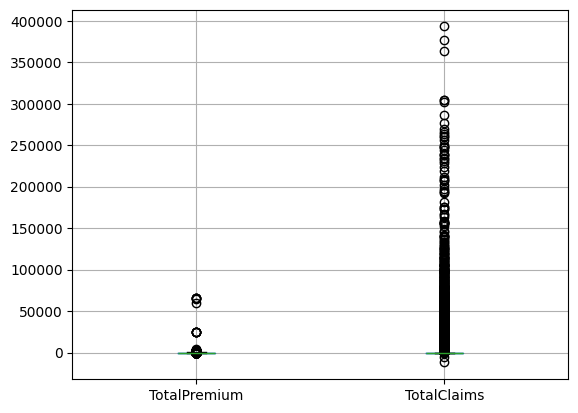

In [47]:
# Plot box plots for numerical columns to detect outliers
numerical_data.boxplot(column=['TotalPremium', 'TotalClaims'])
plt.show()

## Creating insightful and aesthetically pleasing visualizations

### Distribution of Total Premiums

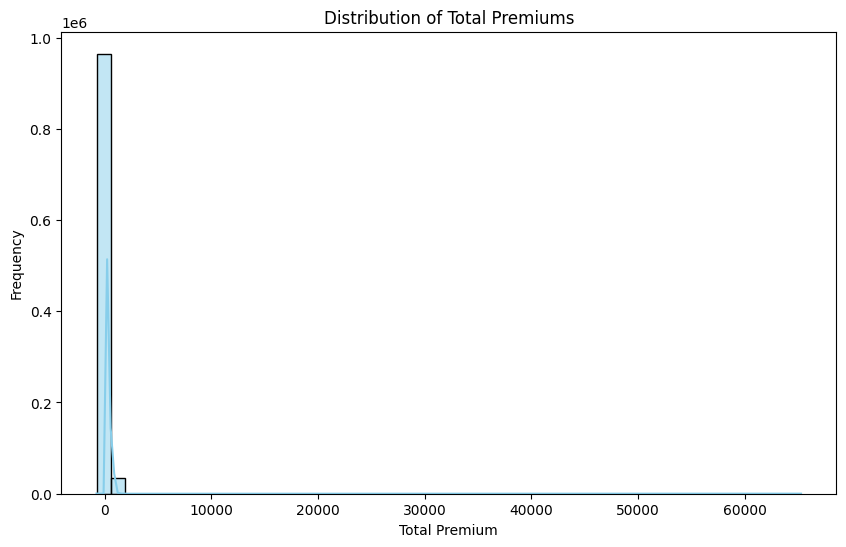

In [48]:
# Distribution plot of Total Premium
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalPremium'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Premiums')
plt.xlabel('Total Premium')
plt.ylabel('Frequency')
plt.show()

### Relationship Between Total Claims and Total Premiums

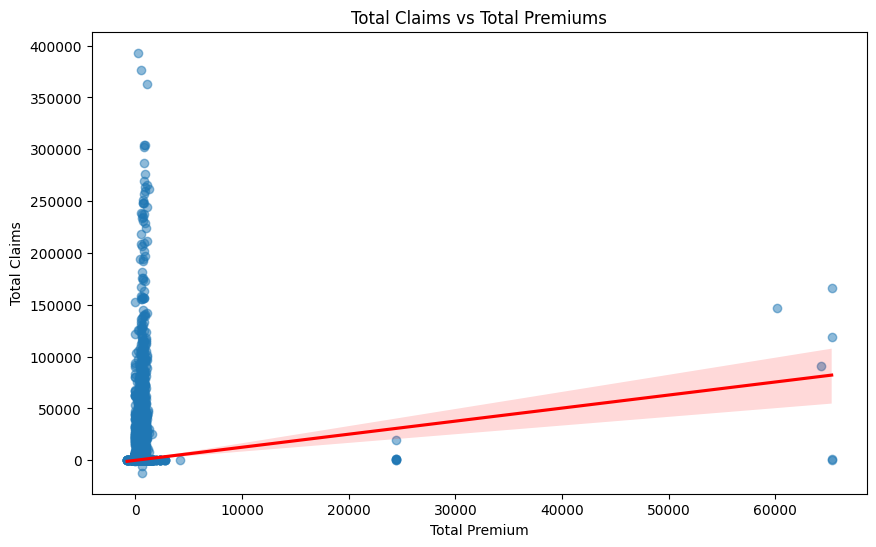

In [49]:
# Scatter plot with regression line for Total Claims vs Total Premiums
plt.figure(figsize=(10, 6))
sns.regplot(x='TotalPremium', y='TotalClaims', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Total Claims vs Total Premiums')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.show()

### Correlation Heatmap with Highlighted Key Variables

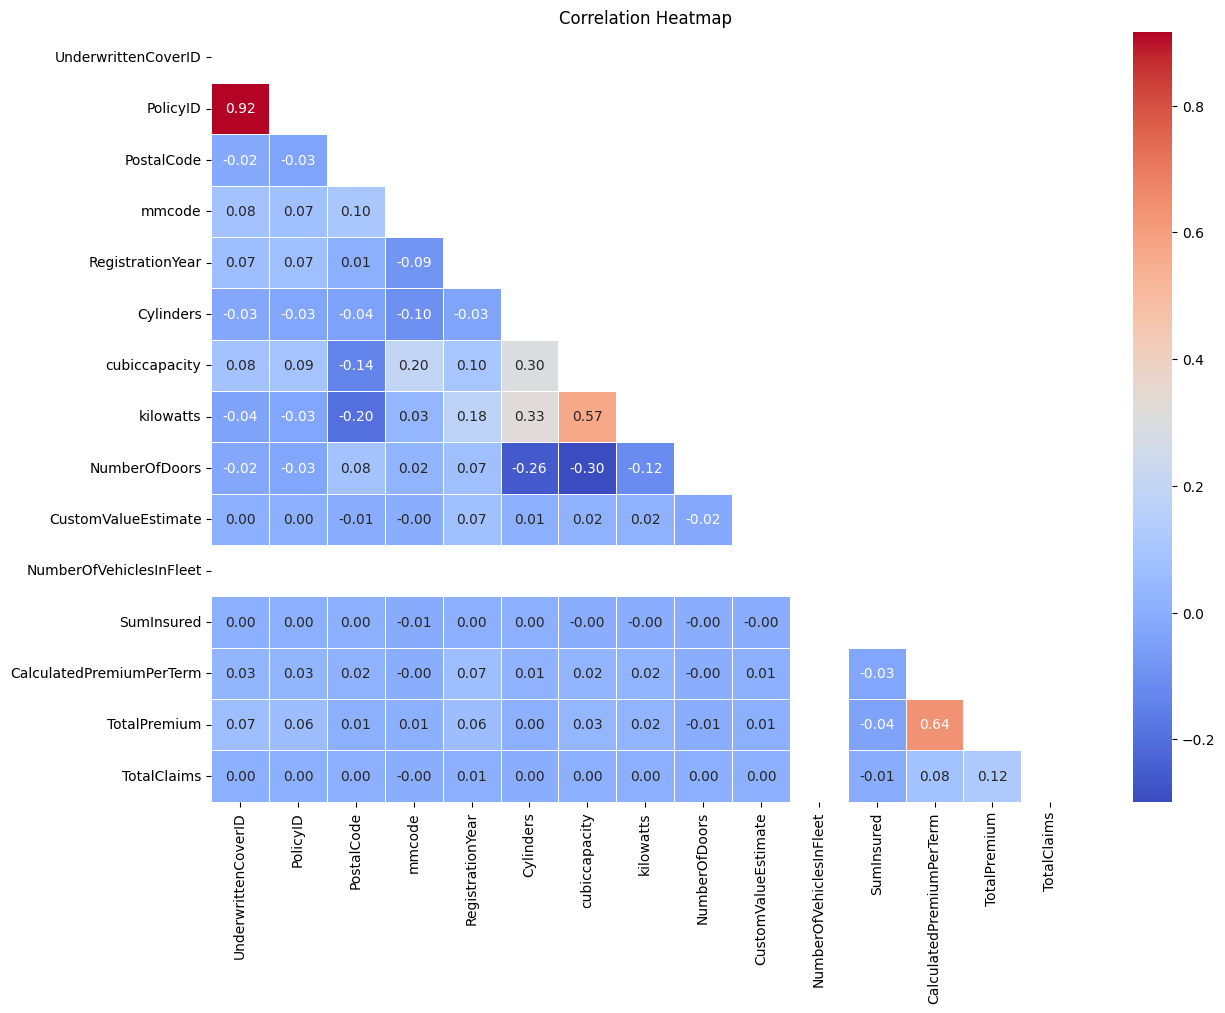

In [52]:
# Compute the correlation matrix
corr_matrix = data.select_dtypes(include=[float, int]).corr()

# Create a mask to display only the lower triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()